# **Laboratorio 13: 💨 Airflow 💨**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Javiera Donoso
- Nombre de alumno 2: Belén Órdenes

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/javieradonoso/Repositorio-MDS7202.git)

## Temas a tratar

- Construcción de pipelines productivos usando `Airflow`.


## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Reconocer los componentes pricipales de `Airflow` y su funcionamiento.
- Poner en práctica la construcción de pipelines de `Airflow`.
- Automatizar procesos típicos de un proyecto de ciencia de datos mediante `Airflow` y `Docker`.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://i.gifer.com/SUFL.gif" width="400">
</p>

Nico, un estudiante del Magíster en Ciencia de Datos, se encuentra en la etapa final de sus estudios. Por un lado, está muy contento por haber llegado tan lejos, pero por otro, no puede evitar sentirse inquieto. Desde que ingresó a la universidad, una pregunta lo ha perseguido: ¿qué tan probable es que pueda ser seleccionado en los lugares donde envíe postulaciones para puestos de trabajo?

Esta duda lo mantiene en constante reflexión, especialmente porque sabe que el mercado laboral en Ciencia de Datos es competitivo y exige habilidades no solo técnicas, sino también estratégicas para destacar. Sin embargo, Nico actualmente está completamente enfocado en terminar su tesis de magíster y ha tenido que postergar cualquier preparación específica para enfrentar el desafío de las postulaciones laborales.

Al ver el avance y las habilidades que usted ha demostrado en el curso, Nico decidió proponerle un desafío que le permitirá disminuir la incertidumbre sobre su futuro laboral. Inspirado en sus conocimientos, él recolectó un conjunto de datos que contiene información sobre diversos factores que influyen en las decisiones de contratación de empresas al seleccionar entre sus postulantes. Este set de datos incluye los siguientes atributos:

- Age: Edad del candidato
- Gender: Genero del candidato. Male (0), Female (1).
- EducationLevel: Mayor nivel educacional alcanzado por el candidato. Licenciatura Tipo 1 (1), Licenciatura Tipo 2 (2), Maestría (3), PhD. (4).
- ExperienceYears: Años de experiencia profesional.
- PreviousCompanies: Numero de compañías donde el candidato ha trabajado anteriormente.
- DistanceFromCompany: Distancia en kilometros entre la residencia del candidato y la compañía donde postula.
- InterviewScore: Puntaje obtenido en la entrevista por el candidato entre 0 a 100.
- SkillScore: Puntaje obtenido en evaluación de habilidades técnicas por el candidato, entre 0 a 100.
- PersonalityScore: Puntaje obtenido en pruebas de personalidad del candidato, entre 0 a 100.
- RecruitmentStrategy: Estrategia del equipo de reclutamiento. Agresiva (1), Moderada (2), Conservadora (3).

Variable a predecir:
- HiringDecision: Resultado de la postulación. No contratado (0), Contratado (1).

Su objetivo será ayudar a Nico a desarrollar un modelo que le permita predecir, basado en estos factores, si un postulante será contratado o no. Esta herramienta no solo le dará a Nico mayor claridad sobre el impacto de ciertos atributos en la decisión final de contratación, sino que también le permitirá aplicar sus conocimientos de Ciencia de Datos para resolver una pregunta que a muchos estudiantes como él les inquieta.

Como estudiante del curso Laboratorio de Programación Científica para Ciencia de Datos, deberá demostrar sus capacidades para preprocesar, analizar y modelar datos, brindándole a Nico una solución robusta y bien fundamentada para su problemática.

`Nota:` El siguiente [enlace](https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data/data) contiene el set de datos original.

# **1. Pipeline de Predicción Lineal** (30 Puntos)

<p align="center">
  <img src="https://c.tenor.com/WvHhQt2UpuAAAAAd/wolf-of-wall-street.gif" width="400">
</p>

En esta sección buscaremos desplegar un producto utilizando un modelo de clasificación `Random Forest` para determinar si una persona será contratada o no en un proceso de selección. Para ello, comenzaremos preparando un pipeline lineal mediante `Airflow`.

## **1.1 Preparando el Pipeline** (15 puntos)

**Primero, asegúrese de tener creada las carpetas `dags`, `plugins` y `logs`**.

Comenzamos preparando un archivo llamado `hiring_functions.py`, el cual guardará en la carpeta `dags` y debe contener lo siguiente:

1. (3 puntos) Una función llamada `create_folders()` que cree una carpeta, la cual utilice la fecha de ejecución como nombre. Adicionalmente, dentro de esta carpeta debe crear las siguientes subcarpetas:
  - raw
  - splits
  - models

  `Hint`: Puede hacer uso de kwargs para obtener la fecha de ejecución mediante el DAG. El siguiente [Enlace](https://airflow.apache.org/docs/apache-airflow/stable/templates-ref.html) le puede ser útil.

2. (3 puntos) Una función llamada `split_data()` que lea el archivo `data_1.csv` de la carepta `raw` y a partir de este, aplique un *hold out*, generando un dataset de entrenamiento y uno de prueba. Luego debe guardar estos nuevos conjuntos de datos en la carpeta `splits`. `Nota:` Utilice un 20% para el conjunto de prueba, mantenga la proporción original en la variable objetivo y fije una semilla.

3. (8 puntos) Cree una función llamada `preprocess_and_train()` que:
  - Lea los set de entrenamiento y prueba de la carpeta `splits`.
  - Cree y aplique un `Pipeline` con una etapa de preprocesamiento. Utilice `ColumnTransformers` para aplicar las transformaciones que estime convenientes. Puede apoyarse del archivo `data_1_report.html` para justificar cualquier paso del preprocesamiento.
  
  - Añada una etapa de entrenamiento utilizando el modelo `RandomForest`.
  
  Esta función **debe crear un archivo `joblib` (análogo a `pickle`) con el pipeline entrenado** en la carepta `models`, además debe **imprimir** el accuracy en el conjunto de prueba y el f1-score de la clase positiva (contratado).

4. (1 punto) Incorpore la función `gradio_interface` en su script, modificando la ruta de acceso a su modelo, de forma que pueda leerlo desde la carepta `models`. Puede realizar modificacioneds adicionales en caso de ser necesario.

`NOTA:` Se permite la creación de funciones auxiliares si lo estiman conveniente.

**Contenido del archivo** `hiring_functions`

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import joblib
import gradio as gr

# Ruta base del proyecto
BASE_PATH = os.path.join(os.getcwd(), 'dags')

# 1. Función create_folders
def create_folders(base_path=BASE_PATH, execution_date=None):
    """
    Crea una estructura de carpetas utilizando la fecha de ejecución del DAG.
    """
    execution_date = datetime.now().strftime("%Y-%m-%d")
    main_folder = os.path.join(base_path, execution_date)
    
    # Crear carpeta principal y subcarpetas
    os.makedirs(main_folder, exist_ok=True)
    subfolders = ['raw', 'splits', 'models']
    for subfolder in subfolders:
        os.makedirs(os.path.join(main_folder, subfolder), exist_ok=True)
    
    print(f"Carpetas creadas en: {main_folder}")
    return main_folder

# 2. Función split_data

def split_data(test_size=0.2, random_state=42):
    """
    Divide el dataset en entrenamiento y prueba, manteniendo proporciones originales.
    Usa automáticamente la fecha de ejecución como parte de la estructura de carpetas.
    """
    # Obtener la fecha actual como execution_date
    execution_date = datetime.now().strftime("%Y-%m-%d")
    
    # Definir rutas basadas en la fecha de ejecución
    raw_folder = os.path.join(BASE_PATH, execution_date, 'raw')
    splits_folder = os.path.join(BASE_PATH, execution_date, 'splits')
    
    # Ruta del archivo raw
    file_path = os.path.join(raw_folder, 'data_1.csv')
    
    # Verificar que el archivo exista
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"El archivo {file_path} no existe.")
    
    # Cargar datos
    data = pd.read_csv(file_path)
    
    # Dividir los datos
    train_data, test_data = train_test_split(
        data, test_size=test_size, random_state=random_state, stratify=data['HiringDecision']
    )
    
    # Guardar los conjuntos
    train_path = os.path.join(splits_folder, 'train.csv')
    test_path = os.path.join(splits_folder, 'test.csv')
    
    # Crear directorio para splits si no existe
    os.makedirs(splits_folder, exist_ok=True)
    train_data.to_csv(train_path, index=False)
    test_data.to_csv(test_path, index=False)
    
    return train_path, test_path

# 3. Función preprocess_and_train

def preprocess_and_train():
    """
    Entrena un modelo RandomForest usando un pipeline con preprocesamiento.
    """
    # Obtener la fecha actual como execution_date
    execution_date = datetime.now().strftime("%Y-%m-%d")
    
    # Definir rutas
    splits_folder = os.path.join(BASE_PATH, execution_date, 'splits')
    models_folder = os.path.join(BASE_PATH, execution_date, 'models')
    
    # Rutas de los archivos de entrenamiento y prueba
    train_path = os.path.join(splits_folder, 'train.csv')
    test_path = os.path.join(splits_folder, 'test.csv')
    
    # Verificar que los archivos existan
    if not os.path.exists(train_path) or not os.path.exists(test_path):
        raise FileNotFoundError("Los archivos de entrenamiento y prueba no existen en la carpeta splits.")
    
    # Cargar los datos
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    
    # Separar características y etiquetas
    X_train, y_train = train_data.drop(columns='HiringDecision'), train_data['HiringDecision']
    X_test, y_test = test_data.drop(columns='HiringDecision'), test_data['HiringDecision']
    
    # Definir columnas numéricas
    numeric_features = ['Age', 'ExperienceYears', 'DistanceFromCompany', 
                        'InterviewScore', 'SkillScore', 'PersonalityScore']
    
    # Preprocesamiento: escalamiento para variables numéricas
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features)
        ]
    )
    
    # Modelo RandomForest
    model = RandomForestClassifier(random_state=42)
    
    # Pipeline con preprocesamiento y modelo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Entrenar el modelo
    pipeline.fit(X_train, y_train)
    
    # Evaluación en el conjunto de prueba
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Guardar el modelo entrenado en la carpeta models
    os.makedirs(models_folder, exist_ok=True)
    model_path = os.path.join(models_folder, 'model.joblib')
    joblib.dump(pipeline, model_path)
    
    print(f"Modelo guardado en: {model_path}")
    return model_path


# 5. Función gradio_interface

def gradio_interface():
    """
    Crea una interfaz interactiva usando Gradio para realizar predicciones con el modelo entrenado.
    Permite subir un archivo JSON con los datos de entrada y devuelve la predicción.
    """
    # Obtener la fecha actual como execution_date
    execution_date = datetime.now().strftime("%Y-%m-%d")
    
    # Ruta al modelo guardado
    models_folder = os.path.join(BASE_PATH, execution_date, 'models')
    model_path = os.path.join(models_folder, 'model.joblib')
    
    # Verificar que el modelo exista
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"El modelo no se encuentra en {model_path}. Asegúrate de entrenarlo antes de usar esta función.")
    
    # Cargar el modelo
    pipeline = joblib.load(model_path)
    
    # Función de predicción
    def predict_from_json(json_file):
        """
        Realiza una predicción basada en los datos contenidos en un archivo JSON.
        """
        # Cargar los datos desde el archivo JSON
        try:
            input_data = pd.read_json(json_file, orient='records')
        except ValueError as e:
            return f"Error al leer el archivo JSON: {e}"
        
        # Verificar que las columnas requeridas existan
        expected_columns = [
            'Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany',
            'InterviewScore', 'SkillScore', 'PersonalityScore', 'Gender',
            'EducationLevel', 'RecruitmentStrategy'
        ]
        if not all(col in input_data.columns for col in expected_columns):
            return f"El archivo JSON debe contener las columnas: {', '.join(expected_columns)}"
        
        # Realizar predicciones
        predictions = pipeline.predict(input_data)
        input_data['Prediction'] = predictions
        input_data['Prediction'] = input_data['Prediction'].apply(lambda x: "Contratado" if x == 1 else "No Contratado")
        
        # Devolver los resultados como JSON
        return input_data.to_json(orient='records', lines=True)
    
    # Crear la interfaz de Gradio
    interface = gr.Interface(
        fn=predict_from_json,
        inputs=gr.File(label="Suba un archivo JSON con los datos del candidato"),
        outputs="text",
        title="Hiring Prediction Model",
        description="Suba un archivo JSON con los datos de candidatos para predecir si serán contratados o no."
    )
    
    # Lanzar la interfaz
    interface.launch(share=True)


En la función `preprocess_and_train` primero se quitan la colimna `HiringDecision` (dado que son target), luego se selccionan algunas de variables en `numeric_features` (que no están escaladas como Gender, EducationLevel, y RecruitmentStrategy) y se usa `ColumnTransformer` con `StandardScaler`. 

## **1.2 Creando Nuestro DAG** (15 puntos)

<p align="center">
  <img src="https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExMzNjd3hxOWIzZjhwZDc5NnJwZzZodnNrbWI5cGtjY2VwZjI0eDdnOSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Dh5q0sShxgp13DwrvG/giphy.webp" width="400">
</p>

Con las funciones del pipeline ya creadas, ahora vamos a proceder a crear un Directed Acyclic Graph (DAG). Para ello, se le pide lo siguiente:

- (10 puntos) Cree un segundo archivo llamado `dag_lineal.py` y guardelo en la carpeta dags. Este script debe seguir la siguiente estructura (Ver imagen de referencia):

    0. Inicialice un DAG con fecha de inicio el 1 de octubre de 2024, ejecución manual y **sin backfill**. Asigne un `dag_id` que pueda reconocer facilmente, como `hiring_lineal`, etc.
    1. Debe comenzar con un marcador de posición que indique el inicio del pipeline.
    2. Cree una carpeta correspondiente a la ejecución del pipeline y cree las subcarpetas `raw`, `splits` y `models` mediante la función `create_folders()`.
    3. Debe descargar el archivo `data_1.csv` del siguiente [enlace](https://gitlab.com/eduardomoyab/laboratorio-13/-/raw/main/files/data_1.csv). Debe guardar el archivo en la carpeta raw de la ejecución correspondiente.`Hint:` Le puede ser útil el comando `curl -o <path de guardado> <enlace con los datos>`.
    4. Debe aplicar un hold out mediante la función `split_data()` de su archivo creado en la subsección anterior.
    5. Debe aplicar el preprocesamiento y el entrenamiento del modelo mediante la función `preprocess_and_train()`.
    6. Finalmente, debe montar una interfaz en gradio donde pueda cargar un archivo ``json``.


- (3 puntos) Cree un `DockerFile` para montar un contenedor que contenga Airflow. Adicionalmente, cree una carpeta llamada dags donde guardará el script.py creado anteriormente.

    `Nota:` Para la imagen, se recomienda utilizar python 3.10-slim. Adicionalmente, puede instalar `curl` mediante la siguiente linea de código: `RUN apt-get update && apt-get install -y curl`.

- Construya el contenedor en Docker y acceda a la aplicación web de Airflow mediante el siguiente [enlace](http://localhost:8080/). Inicie sesión, acceda al DAG creado y ejecute de forma manual su pipeline.

- (2 puntos) Acceda a la URL pública de Gradio e ingrese el archivo `nico_data.json` a su modelo. ¿Que predicción entregó el modelo para Nico? Adjunte imágenes de su resultado. `Hint:` Puede acceder a los `logs` para obtener los prints y la URL pública.

`Hint:` Recuerde que puede entregar `kwargs` a sus funciones, como por ejemplo la fecha de ejecución `ds`.

**Para esta sección, debe adjuntar todos los scripts creados junto a su notebook en la entrega, ya que serán ejecutados para validar el funcionamiento. Para justificar sus respuestas, adicionaslmente puede utilizar imágenes de apoyo, como screenshots.**

DAG de referencia:
<p align="center">
  <img src="https://drive.google.com/uc?id=1iwDgECZfFeWq1dl433tMa6_3CNF9cn1L" width="1200">
</p>




**Contenido del DAG** (`dag_lineal`)

In [ ]:
from airflow import DAG
from airflow.operators.empty import EmptyOperator  # Cambiado DummyOperator a EmptyOperator
from airflow.operators.python import PythonOperator
from airflow.operators.bash import BashOperator
from datetime import datetime
import os
from hiring_functions import create_folders, split_data, preprocess_and_train, gradio_interface

# Definir el DAG
default_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'retries': 0
}

BASE_PATH = os.path.join(os.getcwd(), 'dags')

# URL del dataset
DATA_URL = "https://gitlab.com/eduardomoyab/laboratorio-13/-/raw/main/files/data_1.csv" 

with DAG(
    dag_id='hiring_lineal',
    default_args=default_args,
    description='Pipeline para predecir contrataciones',
    schedule=None,  # Usar el nuevo parámetro `schedule`
    start_date=datetime(2024, 10, 1),
    catchup=False,
    tags=['hiring', 'pipeline']
) as dag:

    # Punto de inicio
    start_pipeline = EmptyOperator(  # Cambiado DummyOperator a EmptyOperator
        task_id='start_pipeline'
    )

    # Crear carpetas
    create_folders_task = PythonOperator(
        task_id='create_folders',
        python_callable=create_folders,
        op_kwargs={
            'base_path': BASE_PATH,
            'execution_date': '{{ ds }}'
        }
    )

    # Descargar el archivo data_1.csv
    download_data_task = BashOperator(
        task_id='download_data',
        bash_command=f"curl -o {BASE_PATH}/{{{{ ds }}}}/raw/data_1.csv {DATA_URL}"
    )

    # Realizar hold-out con split_data
    split_data_task = PythonOperator(
        task_id='split_data',
        python_callable=split_data,
        op_kwargs={
            'execution_date': '{{ ds }}'
        }
    )

    # Entrenamiento y preprocesamiento
    preprocess_and_train_task = PythonOperator(
        task_id='preprocess_and_train',
        python_callable=preprocess_and_train
    )

    # Lanzar interfaz de Gradio
    gradio_interface_task = PythonOperator(
        task_id='gradio_interface',
        python_callable=gradio_interface
    )

    # Definir dependencias del DAG
    start_pipeline >> create_folders_task >> download_data_task >> split_data_task >> preprocess_and_train_task >> gradio_interface_task

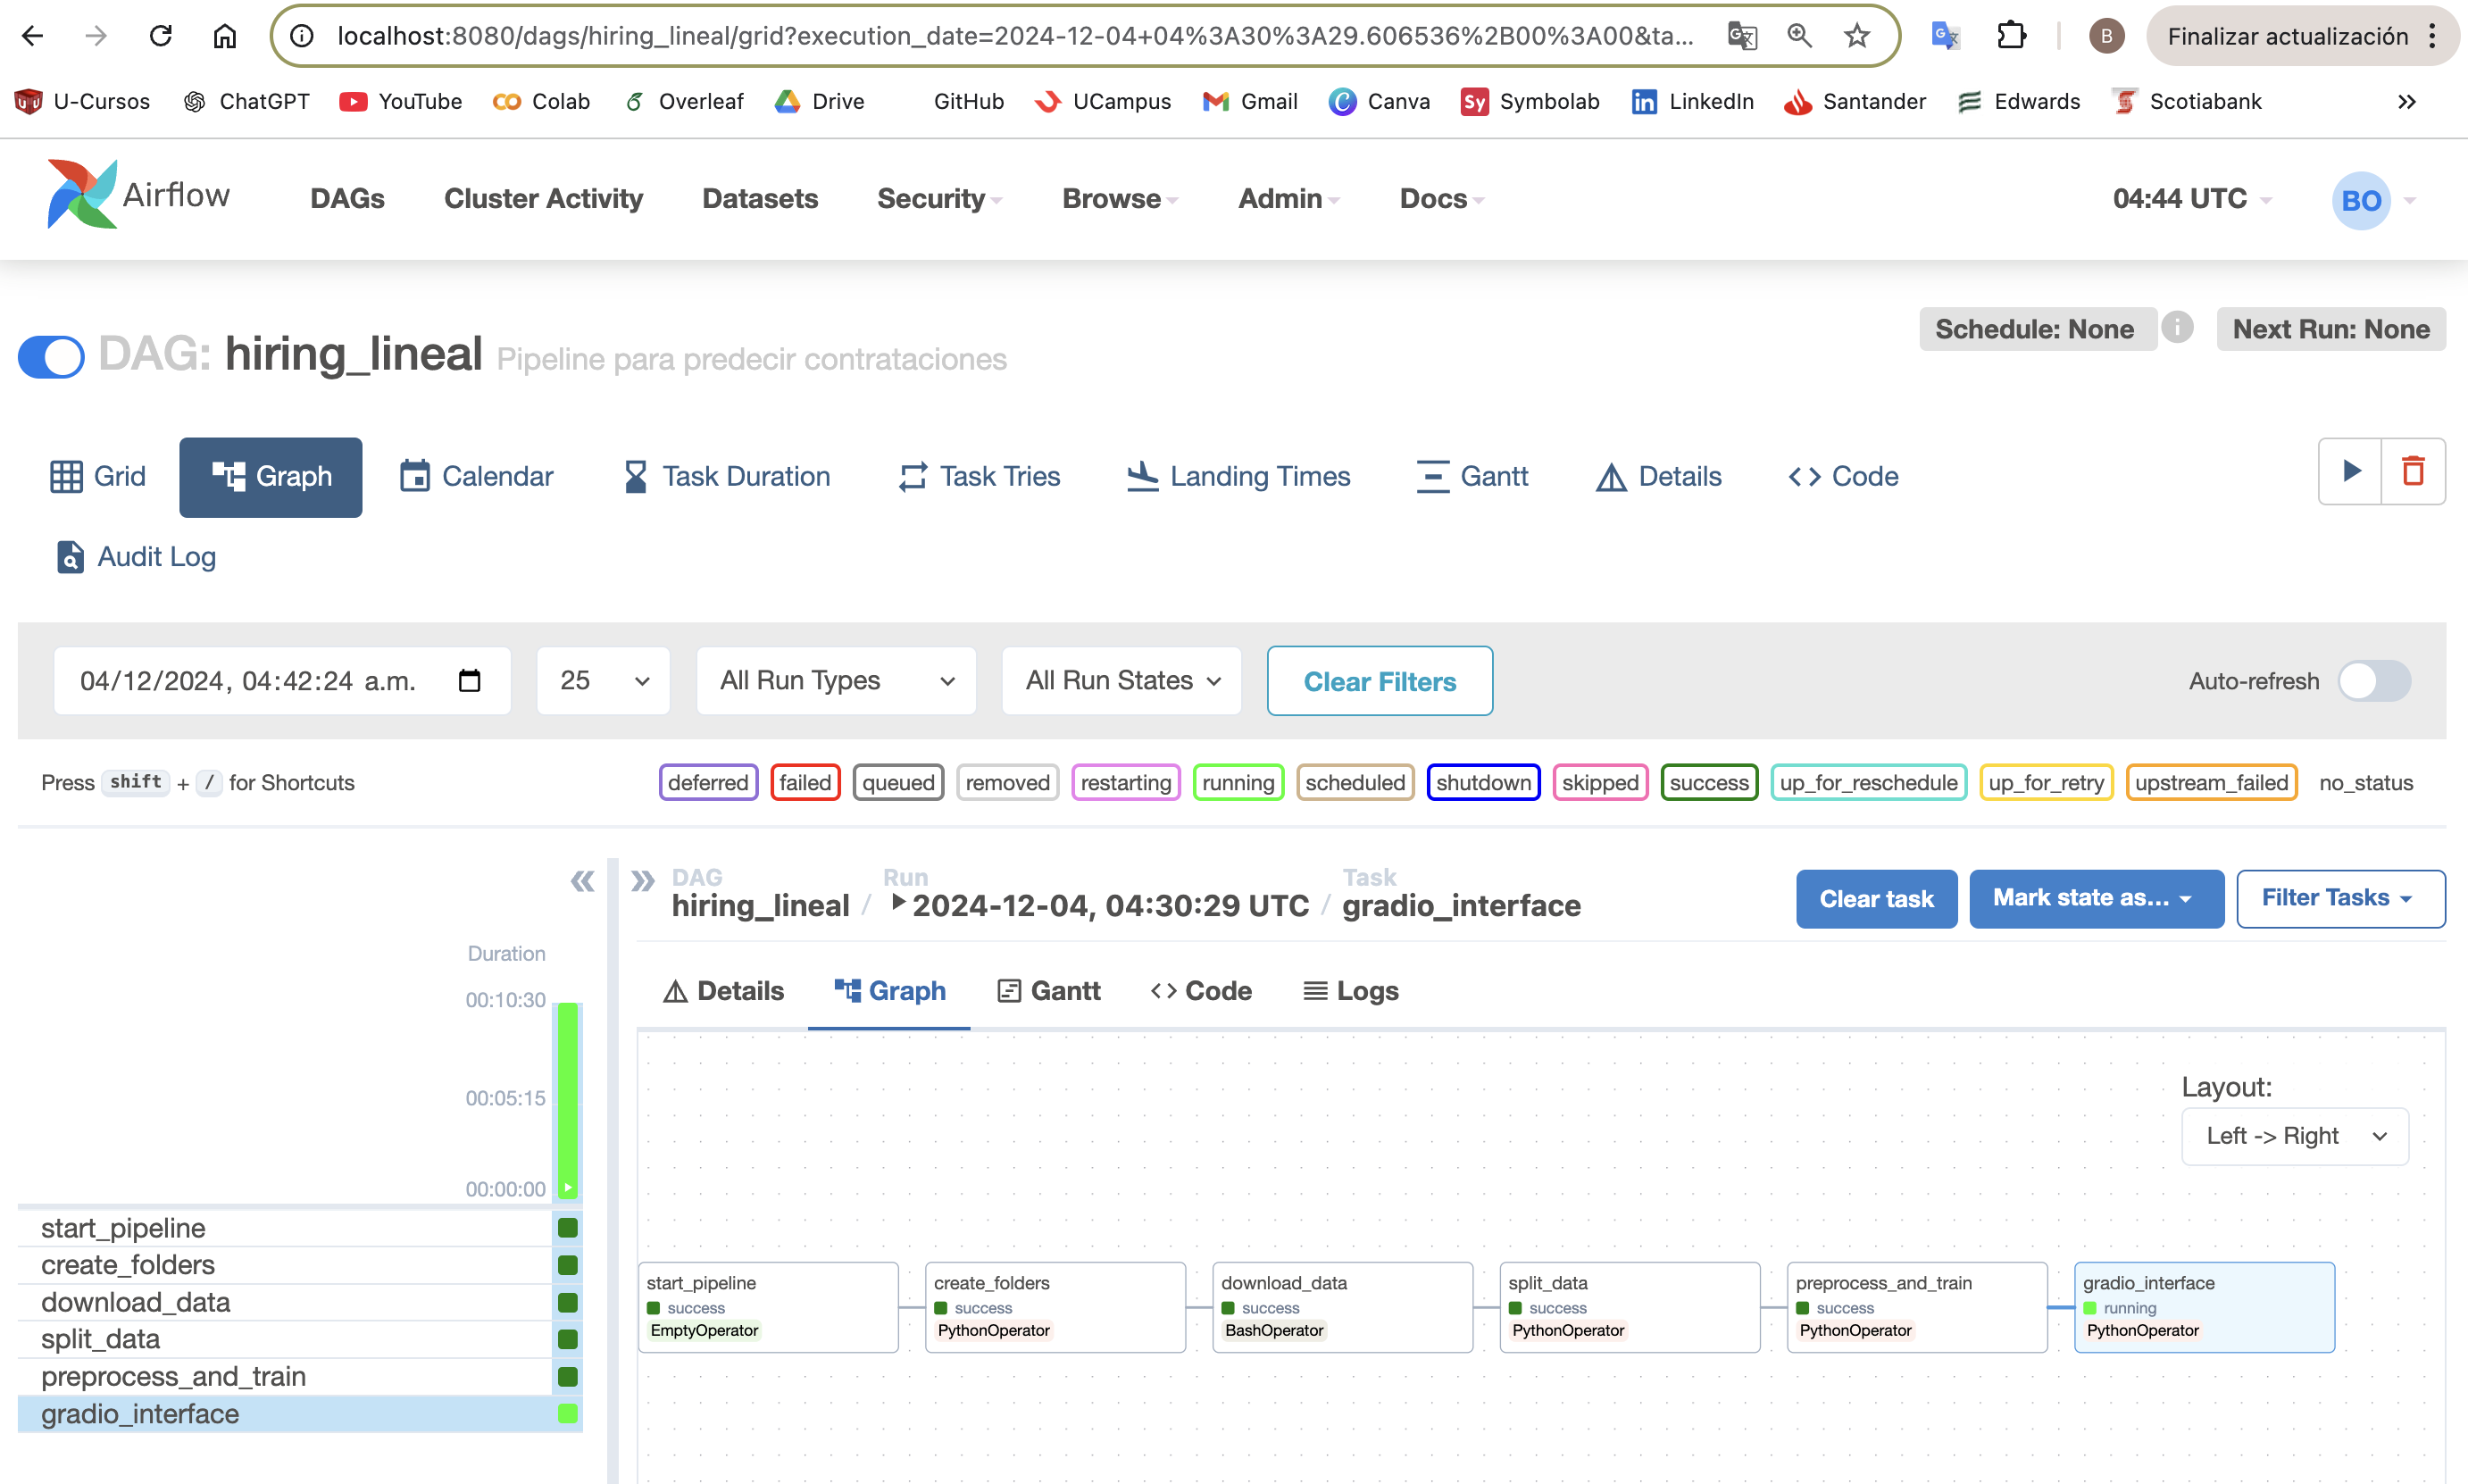

In [3]:
# DAG en airflow
from IPython.display import Image, display
display(Image(filename='Graph-dag.png'))

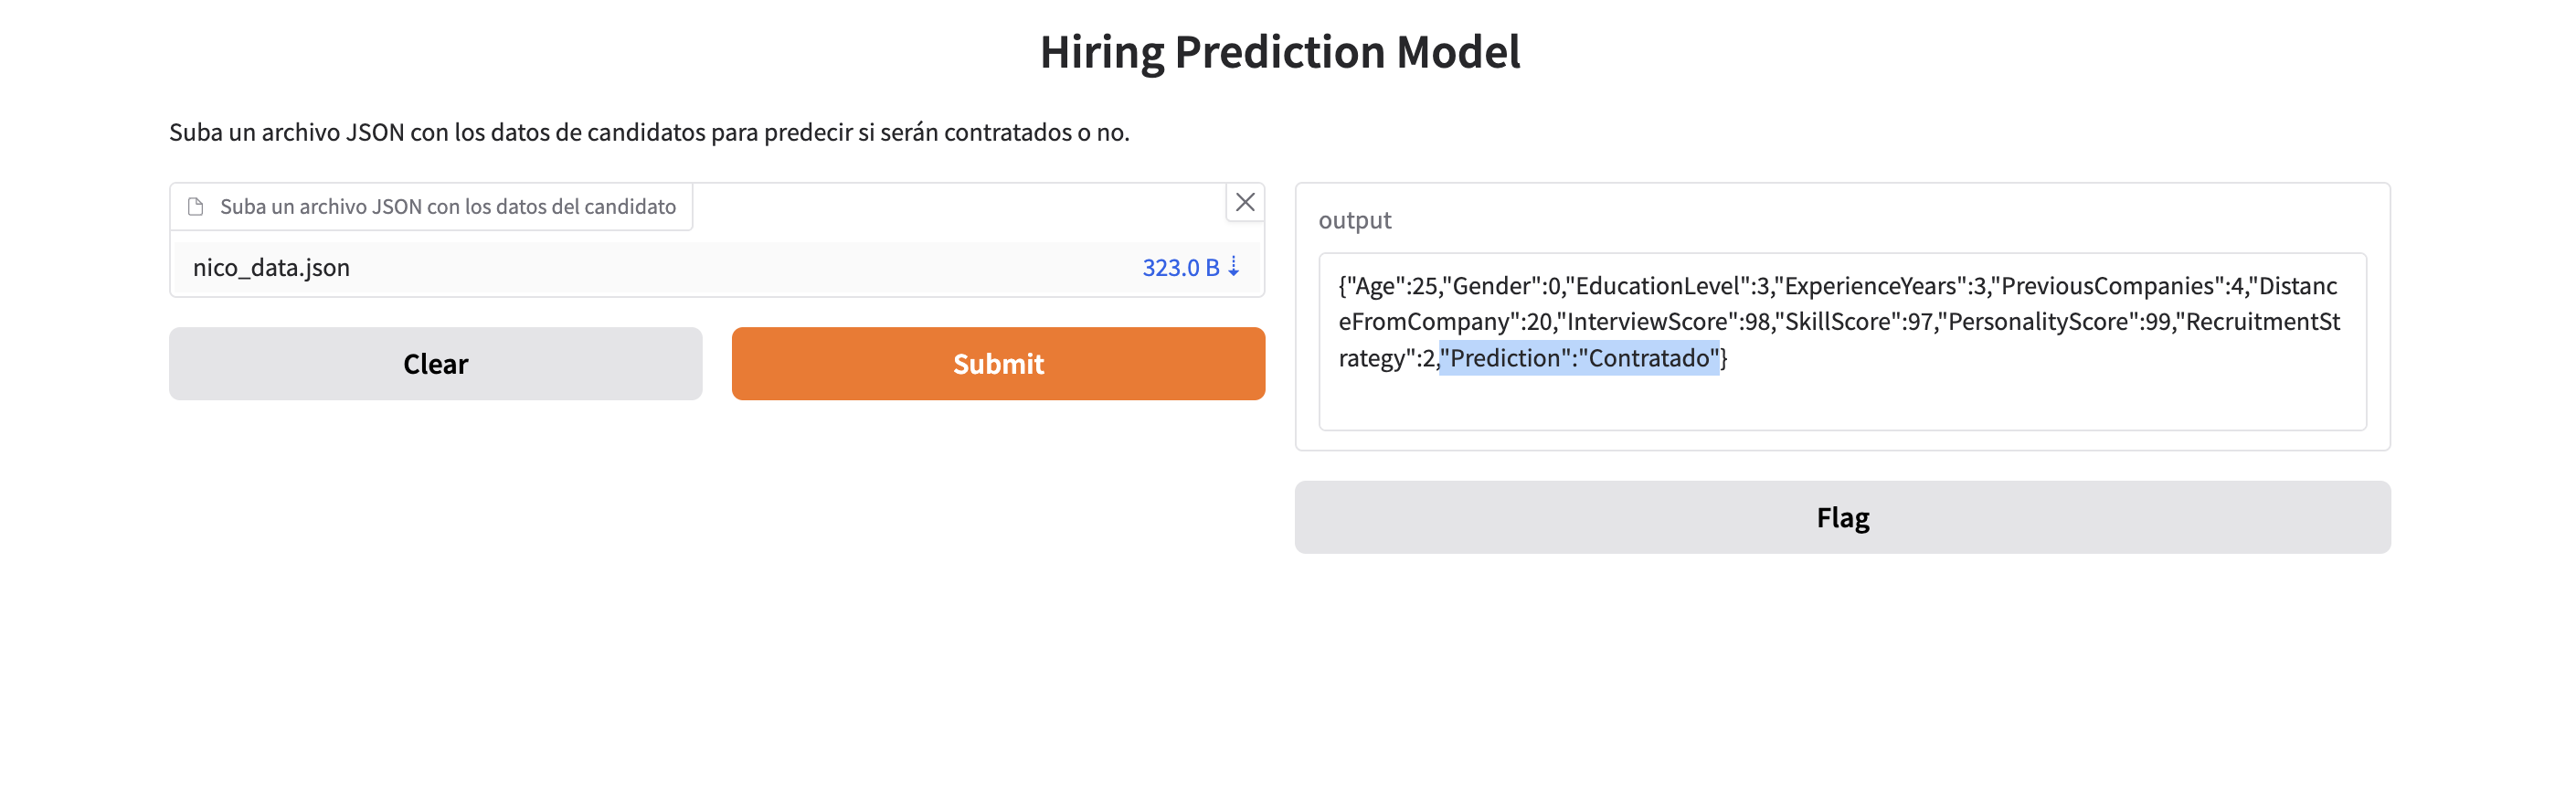

In [4]:
# DAG de airflow
display(Image(filename='nico-prediction.png'))

# **2. Paralelizando el Pipeline** (30 puntos)

<p align="center">
  <img src="https://media.tenor.com/vDv7mn58skcAAAAM/clapping.gif" width="300">
</p>



Al ver los resultados obtenidos, Nico queda muy contento con el clasificador. Sin embargo, le aparecen algunas dudas respecto al funcionamiento del pipeline. Primero le comenta que es posible que en un futuro tenga nuevos datos que podrían ser útiles para realizar nuevos entrenamientos, por lo que sería ideal si este pipeline se fuera ejecutando de forma periódica y no de forma manual. Además, Nico le menciona que le gustaría explorar el desempeño de otros modelos además de `Random Forest`, de forma que el pipeline seleccione de forma automática el modelo con mejor desempeño para luego hacer la predicción de Nico.

## **2.1 Preparando un Nuevo Pipeline** (15 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/7-07-2015/oH6WRw.gif" width="400">
</p>

De acuerdo a lo que le comentó Nico, usted decide crear un nuevo script con las funciones que utilizará su pipeline. Por ende, dentro de la carpeta `dags`, usted creará el archivo `hiring_dynamic_functions.py` el cual debe contener:

1. (2 puntos) Una función llamada `create_folders()` que cree una carpeta, la cual utilice la fecha de ejecución como nombre. Adicionalmente, dentro de esta carpeta debe crear las siguientes subcarpetas:
  - raw
  - preprocessed
  - splits
  - models
2. (2 puntos) Una función llamada `load_ands_merge()` que lea desde la carpeta `raw` los archivos `data_1.csv`y `data_2.csv` en caso de estar disponible. Luego concatene estos y genere un nuevo archivo resultante, guardándolo en la carpeta `preprocessed`.

3. (2 puntos) Una función llamada `split_data()` que lea la data guardada en la carpeta `preprocessed` y realice un hold out sobre esta data. Esta función debe crear un conjunto de entrenamiento y uno de prueba. Mantenga una semilla y 20% para el conjunto de prueba. Guarde los conjuntos resultantes en la carpeta `splits`.

4. (6 puntos) Una función llamada `train_model()` que reciba un modelo de clasificación.
    - La función debe comenzar leyendo el conjunto de entrenamiento desde la carpeta `spits`.
    - Esta debe crear y aplicar un `Pipeline` con una etapa de preprocesamiento. Utilice `ColumnTransformers` para aplicar las transformaciones que estime convenientes.
    - Añada una etapa de entrenamiento utilizando un modelo que ingrese a la función.
  
  Esta función **debe crear un archivo joblib con el pipeline entrenado**. Guarde el modelo con un nombre que le permita una facil identificación dentro de la carpeta `models`.

5. (3 puntos) Una función llamada `evaluate_models()` que reciba sus modelos entrenados desde la carpeta `models`, evalúe su desempeño mediante `accuracy` en el conjunto de prueba y seleccione el mejor modelo obtenido. Luego guarde el mejor modelo como archivo `.joblib`. Su función debe imprimir el nombre del modelo seleccionado y el accuracy obtenido.

**Códifo de** `hiring_dynamic_functions`

In [ ]:
import os
import joblib
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# 1. Cargar y unir datos
def load_and_merge(**kwargs):
    execution_date = kwargs.get('ds', datetime.now().strftime('%Y-%m-%d'))
    raw_path = os.path.join(f'data_{execution_date}', 'raw')
    preprocessed_path = os.path.join(f'data_{execution_date}', 'preprocessed')

    data_files = [os.path.join(raw_path, f) for f in ['data_1.csv', 'data_2.csv'] if os.path.exists(os.path.join(raw_path, f))]

    df = pd.concat([pd.read_csv(file) for file in data_files], ignore_index=True)
    output_path = os.path.join(preprocessed_path, 'merged_data.csv')
    df.to_csv(output_path, index=False)
    print(f"Archivos unidos y guardados en {output_path}")


# 2. División de datos
def split_data(**kwargs):
    execution_date = kwargs.get('ds', datetime.now().strftime('%Y-%m-%d'))
    preprocessed_path = os.path.join(f'data_{execution_date}', 'preprocessed', 'merged_data.csv')
    splits_path = os.path.join(f'data_{execution_date}', 'splits')

    df = pd.read_csv(preprocessed_path)
    X = df.drop(columns=['HiringDecision'])
    y = df['HiringDecision']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=99
    )

    X_train.to_csv(os.path.join(splits_path, 'X_train.csv'), index=False)
    X_test.to_csv(os.path.join(splits_path, 'X_test.csv'), index=False)
    y_train.to_csv(os.path.join(splits_path, 'y_train.csv'), index=False)
    y_test.to_csv(os.path.join(splits_path, 'y_test.csv'), index=False)


# 3. Evaluación de modelos
def evaluate_models(**kwargs):
    execution_date = kwargs.get('ds', datetime.now().strftime('%Y-%m-%d'))
    splits_path = os.path.join(f'data_{execution_date}', 'splits')
    models_path = os.path.join(f'data_{execution_date}', 'models')

    X_test = pd.read_csv(os.path.join(splits_path, 'X_test.csv'))
    y_test = pd.read_csv(os.path.join(splits_path, 'y_test.csv')).squeeze()

    model_files = [f for f in os.listdir(models_path) if f.endswith('.joblib')]
    best_model = None
    best_accuracy = 0

    for model_file in model_files:
        model_path = os.path.join(models_path, model_file)
        clf = joblib.load(model_path)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"Modelo {model_file}: Accuracy = {acc:.2f}")

        if acc > best_accuracy:
            best_accuracy = acc
            best_model = model_file

    if best_model:
        best_model_path = os.path.join(models_path, 'best_model.joblib')
        os.rename(os.path.join(models_path, best_model), best_model_path)
        print(f"Mejor modelo: {best_model} con Accuracy = {best_accuracy:.2f}")


# 4. Entrenamiento del modelo
def train_model(model, **kwargs):
    execution_date = kwargs.get('ds', datetime.now().strftime('%Y-%m-%d'))
    splits_path = os.path.join(f'data_{execution_date}', 'splits')
    models_path = os.path.join(f'data_{execution_date}', 'models')

    X_train = pd.read_csv(os.path.join(splits_path, 'X_train.csv'))
    y_train = pd.read_csv(os.path.join(splits_path, 'y_train.csv')).squeeze()

    numerical_features = ['Age', 'ExperienceYears', 'PreviousCompanies',
                           'DistanceFromCompany', 'InterviewScore',
                           'SkillScore', 'PersonalityScore']
    categorical_features = ['Gender', 'EducationLevel', 'RecruitmentStrategy']

    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    clf.fit(X_train, y_train)
    model_name = model.__class__.__name__
    model_path = os.path.join(models_path, f'{model_name}_hiring_model.joblib')
    joblib.dump(clf, model_path)
    print(f"Modelo {model_name} entrenado y guardado en {model_path}")


# 5. Crear carpetas
def create_folders(**kwargs):
    execution_date = kwargs.get('ds', datetime.now().strftime('%Y-%m-%d'))
    folder_name = f"data_{execution_date}"
    os.makedirs(folder_name, exist_ok=True)
    os.makedirs(os.path.join(folder_name, 'raw'), exist_ok=True)
    os.makedirs(os.path.join(folder_name, 'preprocessed'), exist_ok=True)
    os.makedirs(os.path.join(folder_name, 'splits'), exist_ok=True)
    os.makedirs(os.path.join(folder_name, 'models'), exist_ok=True)
    print(f"Carpetas creadas en {folder_name}")

## **2.2 Componiendo un nuevo DAG** (15 puntos)

<p align="center">
  <img src="https://y.yarn.co/977552ab-0b55-4118-9948-06f6386474da_text.gif" width="400">
</p>

Con las nuevas funciones, vamos a crear nuestro nuevo DAG. Para ello, cree un nuevo script en la carpeta `dags`, llamandolo `dag_dynamic.py`. Este script debe contener la siguiente estructura:

1. (1 punto) Inicialice un DAG con fecha de inicio el 1 de octubre de 2024, el cual se debe ejecutar el día 5 de cada mes a las 15:00 UTC. Utilice un `dag_id` interpretable para identificar fácilmente. **Habilite el backfill** para que pueda ejecutar tareas programadas desde fechas pasadas.
2. (1 punto) Comience con un marcador de posición que indique el inicio del pipeline.
3. (2 puntos) Cree una carpeta correspondiente a la ejecución del pipeline y cree las subcarpetas `raw`, `preprocessed`, `splits` y `models` mediante la función `create_folders()`.
4. (2 puntos) Implemente un `Branching`que siga la siguiente lógica:
  - Fechas previas al 1 de noviembre de 2024: Se descarga solo `data_1.csv`
  - Desde el 1 de noviembre del 2024: descarga `data_1.csv` y `data_2.csv`.
  En el siguiente [enlace](https://gitlab.com/eduardomoyab/laboratorio-13/-/raw/main/files/data_2.csv) puede descargar `data_2.csv`.
5. (1 punto) Cree una tarea que concatene los datasets disponibles mediante la función `load_and_merge()`. Configure un `Trigger` para que la tarea se ejecute si encuentra disponible **como mínimo** uno de los archivos.
6. (1 punto) Aplique el hold out al dataset mediante la función `split_data()`, obteniendo un conjunto de entrenamiento y uno de prueba.
7. (2 puntos) Realice 3 entrenamientos en paralelo:
  - Un modelo Random Forest.
  - 2 modelos a elección.
  Asegúrese de guardar sus modelos entrenados con nombres distintivos. Utilice su función `train_model()` para ello.
8. (2 puntos)Mediante la función `evaluate_models()`, evalúe los modelos entrenados, registrando el accuracy de cada modelo en el set de prueba. Luego debe imprimir el mejor modelo seleccionado y su respectiva métrica. Configure un `Trigger` para que la tarea se ejecute solamente si los 3 modelos fueron entrenados y guardados.

`Hint:` Recuerde que puede entregar `kwargs` a sus funciones, como por ejemplo la fecha de ejecución `ds`.

Una vez creado el script, vuelva a construir el contenedor en Docker, acceda a la aplicación web de Airflow, ejecute su pipeline y muestre sus resultados. Adjunte imágenes que ayuden a mostrar el proceso y sus resultados.

Adicionalmente, responda (1 c/u):

- ¿Cual es el accuracy de cada modelo en la ejecución de octubre? ¿Se obtienen los mismos resultados a partir de Noviembre?
- Analice como afectó el añadir datos a sus modelos mediante el desempeño del modelo y en costo computacional.
- Muestre el esquema de su DAG ejecutado en octubre y en noviembre.


`Nota:` Para esta sección no debe implementar la tarea en gradio, solamente se espera determinar el mejor modelo y comparar el desempeño obtenido.

**IMPORTANTE: Para esta sección, debe adjuntar todos los scripts creados junto a su notebook en la entrega, ya que serán ejecutados para validar el funcionamiento. Para justificar sus respuestas, adicionaslmente puede utilizar imágenes de apoyo, como screenshots.**

**Contenido de** `dag_dynamic`

In [ ]:
import os
import subprocess
from datetime import datetime, timedelta
from airflow import DAG
from airflow.operators.python_operator import PythonOperator, BranchPythonOperator
from airflow.operators.dummy import DummyOperator
from airflow.utils.trigger_rule import TriggerRule
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from hiring_dynamic_functions import (
    create_folders,
    load_and_merge,
    split_data,
    train_model,
    evaluate_models,
)

# Configuración inicial del DAG
default_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'retries': 1,
    'retry_delay': timedelta(minutes=10),
}

dag = DAG(
    dag_id='hiring_dynamic',
    default_args=default_args,
    description='Dynamic DAG for hiring model pipeline',
    schedule='0 15 5 * *',  # Cada 5 del mes a las 15:00 UTC
    start_date=datetime(2024, 10, 1),
    catchup=True,  # Habilitar backfill
) 

# Función para descargar datos
def download_data(file_url, output_file, **kwargs):
    execution_date = kwargs['ds']
    folder_name = f"data_{execution_date}"
    raw_path = os.path.join(folder_name, 'raw')
    os.makedirs(raw_path, exist_ok=True)
    file_path = os.path.join(raw_path, output_file)

    result = subprocess.run(
        ['curl', '-o', file_path, file_url],
        check=True,
        capture_output=True
    )
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"No se descargó {output_file}. Error: {result.stderr.decode()}")
    print(f"Archivo descargado en: {file_path}")

# Función de branching
def branching_logic(execution_date, **kwargs):
    execution_date_naive = execution_date.replace(tzinfo=None)
    return 'download_data_2' if execution_date_naive >= datetime(2024, 11, 1) else 'download_data_1'

# 1. Inicio del pipeline
start_pipeline = DummyOperator(
    task_id='start_pipeline',
    dag=dag
)

# 2. Crear carpetas
create_folders_task = PythonOperator(
    task_id='create_folders',
    python_callable=create_folders,
    provide_context=True,
    dag=dag
)

# 3. Descargar datos
download_data_1 = PythonOperator(
    task_id='download_data_1',
    python_callable=download_data,
    op_kwargs={
        'file_url': 'https://gitlab.com/eduardomoyab/laboratorio-13/-/raw/main/files/data_1.csv',
        'output_file': 'data_1.csv',
    },
    provide_context=True,
    dag=dag
)

download_data_2 = PythonOperator(
    task_id='download_data_2',
    python_callable=download_data,
    op_kwargs={
        'file_url': 'https://gitlab.com/eduardomoyab/laboratorio-13/-/raw/main/files/data_2.csv',
        'output_file': 'data_2.csv',
    },
    provide_context=True,
    dag=dag
)

# 4. Branching
branching_task = BranchPythonOperator(
    task_id='branching',
    python_callable=branching_logic,
    provide_context=True,
    dag=dag
)

# 5. Unir datos
merge_branch = DummyOperator(
    task_id='merge_branch',
    trigger_rule=TriggerRule.ONE_SUCCESS,
    dag=dag
)

merge_data_task = PythonOperator(
    task_id='merge_data',
    python_callable=load_and_merge,
    provide_context=True,
    dag=dag
)

# 6. Dividir datos
split_data_task = PythonOperator(
    task_id='split_data',
    python_callable=split_data,
    provide_context=True,
    dag=dag
)

# 7. Entrenar modelos
train_rf_task = PythonOperator(
    task_id='train_rf',
    python_callable=train_model,
    op_kwargs={'model': RandomForestClassifier(random_state=42)},
    provide_context=True,
    dag=dag
)

train_lr_task = PythonOperator(
    task_id='train_lr',
    python_callable=train_model,
    op_kwargs={'model': LogisticRegression(max_iter=1000, random_state=42)},
    provide_context=True,
    dag=dag
)

train_xgb_task = PythonOperator(
    task_id='train_xgb_classifier',
    python_callable=train_model,
    op_kwargs={'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)},
    provide_context=True,
    dag=dag
)

# 8. Evaluar modelos
evaluate_models_task = PythonOperator(
    task_id='evaluate_models',
    python_callable=evaluate_models,
    provide_context=True,
    trigger_rule=TriggerRule.ALL_SUCCESS,
    dag=dag
)

# Configuración del pipeline
start_pipeline >> create_folders_task
create_folders_task >> branching_task
branching_task >> [download_data_1, download_data_2]
[download_data_1, download_data_2] >> merge_branch
merge_branch >> merge_data_task >> split_data_task
split_data_task >> [train_rf_task, train_lr_task, train_xgb_task] >> evaluate_models_task

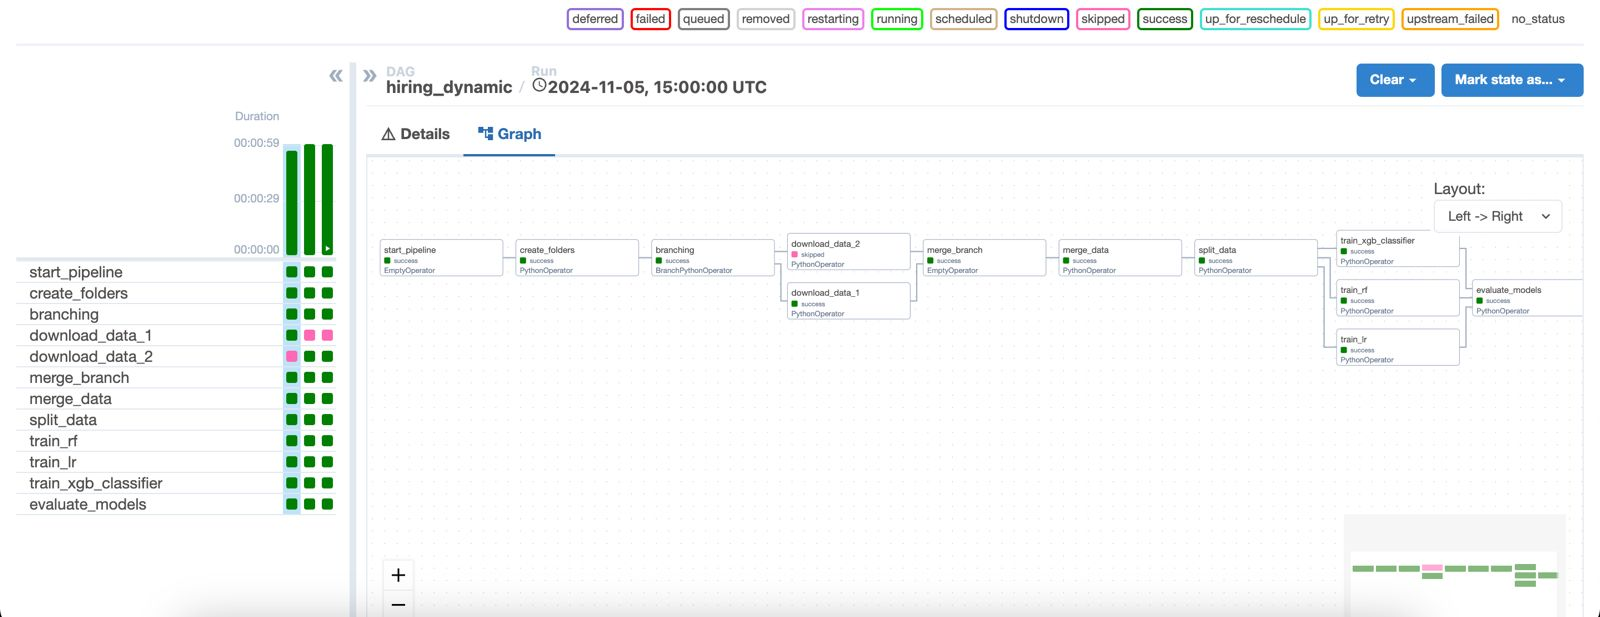

In [6]:
# DAG en airflow
display(Image(filename='octubre.jpeg'))

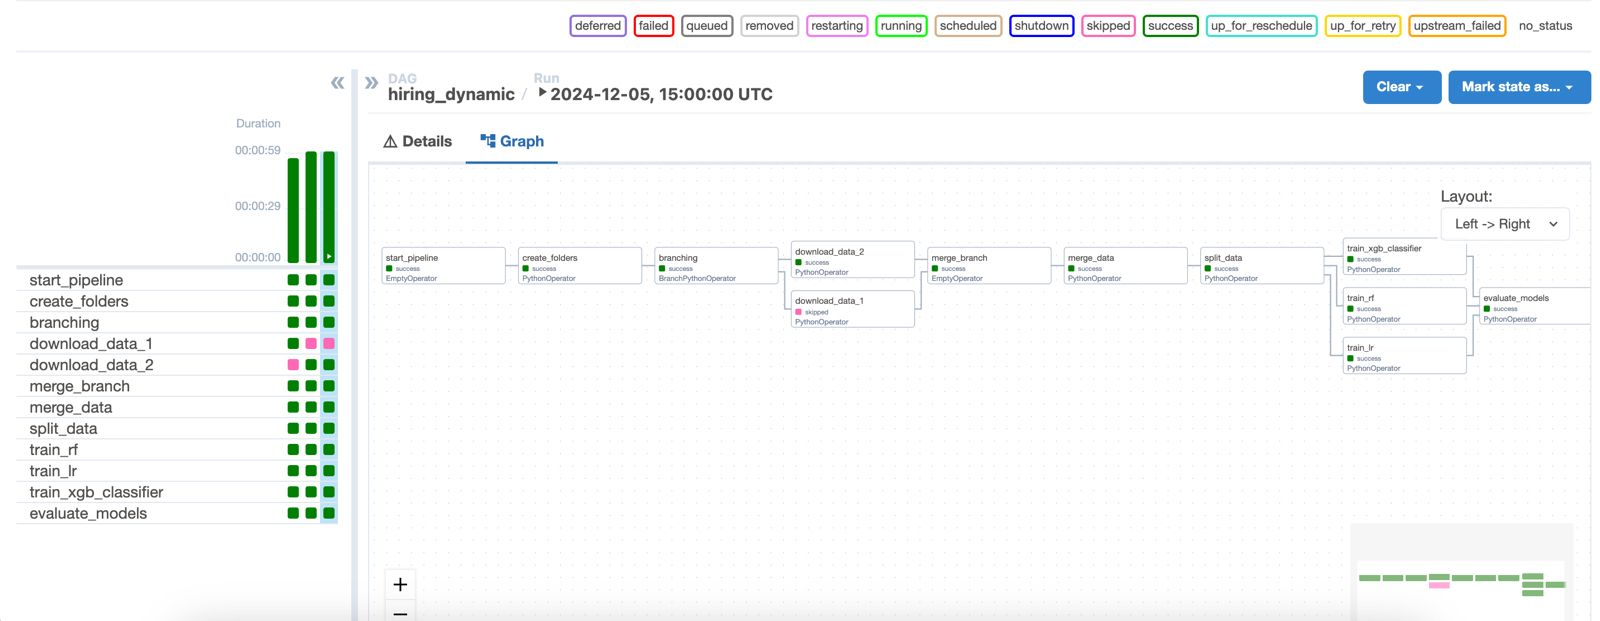

In [8]:
# DAG en airflow
display(Image(filename='noviembre.jpeg'))

- ¿Cual es el accuracy de cada modelo en la ejecución de octubre? ¿Se obtienen los mismos resultados a partir de Noviembre?

En octubre se obtiene accuracy para random forest = 0.91, para XGBClassifier = 0.92 y para LogisticRegression = 0.93, siendo este ultimo el mejor modelo. En noviembre los resultados son random forest = 0.87, para XGBClassifier = 0.91 y para LogisticRegression = 0.89, siendo XGBoost el mejor modelo en este mes.

- Analice como afectó el añadir datos a sus modelos mediante el desempeño del modelo y en costo computacional.

Observamos que al añadir más datos (en el mes de noviembre), el accuracy disminuyó en los 3 modelos, donde solo en XGBoost fue el que menos cayó con solo 0.01, en cambio, RF y LR disminuyeron en 0.04. El costo computacional no varía demasiado siendo unos 10 segundos más el de noviembre.

- Muestre el esquema de su DAG ejecutado en octubre y en noviembre.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://media0.giphy.com/media/W12WAzuqod9VS/200w.gif?cid=6c09b952gekq3fm1no1ttwcvgm9oj3khbm6yxbe6qwnx3nad&ep=v1_gifs_search&rid=200w.gif&ct=g" width = 400 />
